# HW9 Morphology: Shape Filtering

Download morpho1.gif and morpho2.gif. Convert both images to boolean before applying any morphological shape filters. Note: Foreground is black (0) while background is white (1). 

MORPHO1: Determine a sequence of one or more morphological operations that leave the larger circular objects (more or less) intact while removing the small lines and small black circular objects. Show before and after images as well the difference thereof (black objects that have been removed).

MORPHO2: Determine a sequence of morphological operations that cluster the many small objects into a handful of larger objects. Each object pixels must be 4-connected with a cluster pixel (touch on the side, not just diagonally). Show before and after images as well as a gray overlay of the result with the input on top (like the convex hull from class).

ECE472: Process *either* morpho1 *or* morpho2.

ECE572: Process morpho1 *as well as* morpho2.

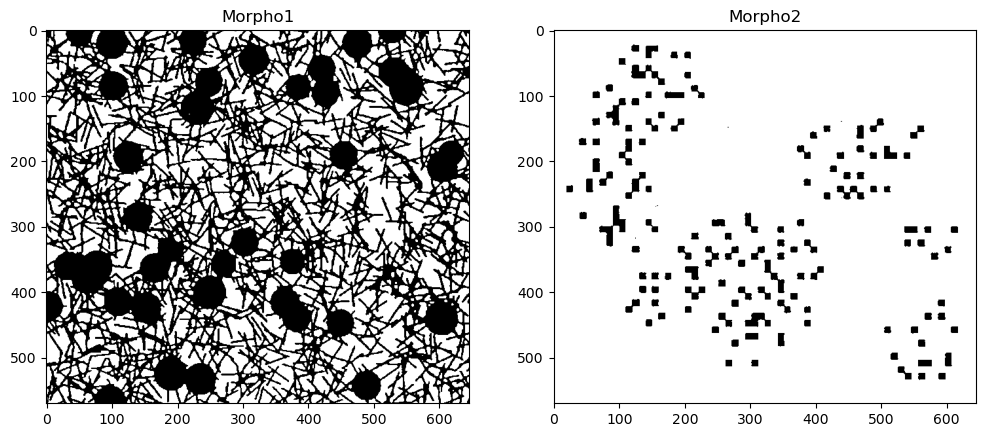

In [1]:
%matplotlib inline

import time

import numpy as np

import matplotlib.image as img
import matplotlib.pyplot as plt

from skimage import io
from skimage.util import img_as_ubyte, img_as_bool, invert

from skimage.filters import threshold_otsu

from skimage.morphology import disk, square
from skimage.morphology import binary_dilation
from skimage.morphology import reconstruction
from skimage.morphology import opening, closing
from skimage.morphology import dilation, erosion
from scipy.ndimage import binary_dilation, binary_erosion
from scipy.ndimage import binary_opening, binary_closing

def show_images(I, titles=None):
     fig, ax = plt.subplots(1, len(I), figsize=(12,12))
    
     for i in np.arange(0,len(I)):
         ax[i].imshow(I[i], cmap='gray')
         if titles != None:
             ax[i].set_title(titles[i])


            
# Read morpho1.gif and morpho2.gif
# Display as shown in hw9_layout1.png
I1 = io.imread("morpho1.gif", as_gray=True)
I1 = img_as_ubyte(I1)

I2 = io.imread("morpho2.gif", as_gray=True)
I2 = img_as_ubyte(I2)

#used print statments to find the thresholds, then based np.where logic on that
#print(np.max(I1))
#print(np.max(I2))

# Binary coversion where foreground is black and background is white
B1 = np.where(I1<255, False, True)
B2 = np.where(I2<255, False, True)

T1 = 'Morpho1'
T2 = 'Morpho2'
#comparison #show_images([I1, I2],[T1, T2])
show_images([B1, B2],[T1, T2])

## Morpho1 Filtering

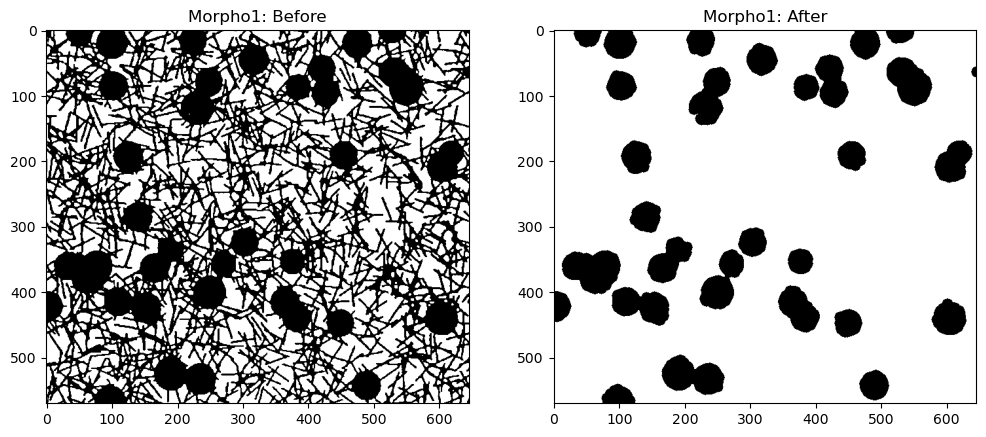

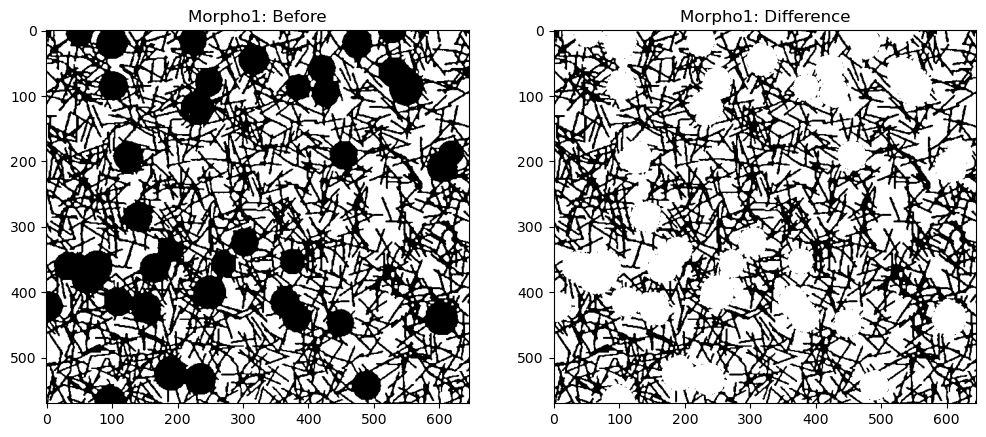

In [2]:
# Clean up morpho1.gif
# Display as shown in hw9_layout2.png
#To match exact value as in layout_2 using disk(5) would match
C1 = closing(B1, disk(8)) # remove small lines

T1 = 'Morpho1: Before'
T2 = 'Morpho1: After'
show_images([B1, C1],[T1, T2])

# remove black dots by applying difference (xor) and inverting
B3 = B1^C1
B3 = invert(B3)


T1 = 'Morpho1: Before'
T2 = 'Morpho1: Difference'
show_images([B1, B3],[T1, T2])



## Morpho2 Filtering

In [3]:
# Clean up morpho2.gif
# Display as shown in hw9_layout3.png